In [51]:
import pandas as pd
import numpy as np
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

In [52]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [53]:
ratings = ratings.drop(columns = 'timestamp')
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [54]:
tags = tags.drop(columns = 'timestamp')
tags

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA
...,...,...,...
3678,606,7382,for katie
3679,606,7936,austere
3680,610,3265,gun fu
3681,610,3265,heroic bloodshed


In [55]:
tagsRatings = pd.merge(tags, ratings, on = ['userId', 'movieId'])
tagsRatings

,userId,movieId,tag,rating
0,2,60756,funny,5.0
1,2,60756,Highly quotable,5.0
2,2,60756,will ferrell,5.0
3,2,89774,Boxing story,5.0
4,2,89774,MMA,5.0
...,...,...,...,...
3471,606,6107,World War II,4.0
3472,606,7382,for katie,4.5
3473,610,3265,gun fu,5.0
3474,610,3265,heroic bloodshed,5.0


In [56]:
df = pd.merge(movies, tagsRatings, on = ('movieId'))

In [57]:
df

,movieId,title,genres,userId,tag,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.5
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,4.0
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,4.0
...,...,...,...,...,...,...
3471,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,4.0
3472,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,3.5
3473,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,3.5
3474,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,3.5


# Data Cleaning

In [58]:
df.isna().sum()

movieId    0
title      0
genres     0
userId     0
tag        0
rating     0
dtype: int64

In [59]:
df['rating'].value_counts()

4.0    999
5.0    883
3.5    577
4.5    496
3.0    274
2.0    102
2.5     80
1.0     31
1.5     26
0.5      8
Name: rating, dtype: int64

In [68]:
ratingList = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

def makeNotFloat(oldList, columnName):
    binaryList = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    newVals = dict(zip(oldList, binaryList))
    return df[columnName].replace(newVals, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  3476 non-null   int64  
 1   title    3476 non-null   object 
 2   genres   3476 non-null   object 
 3   userId   3476 non-null   int64  
 4   tag      3476 non-null   object 
 5   rating   3476 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 190.1+ KB


In [69]:
makeNotFloat(ratingList, 'rating')

In [70]:
df['rating'].value_counts()

40.0    999
50.0    883
35.0    577
45.0    496
30.0    274
20.0    102
25.0     80
10.0     31
15.0     26
5.0       8
Name: rating, dtype: int64

In [72]:
df['rating'] = df['rating'].astype(int)
df['rating'].value_counts()

40    999
50    883
35    577
45    496
30    274
20    102
25     80
10     31
15     26
5       8
Name: rating, dtype: int64

# Model data prep

In [73]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import category_encoders as ce

xCols = [c for c in df.columns.to_list() if c not in ['rating']]

x = df[xCols]
y = df['rating']

scaler = StandardScaler(with_mean=False)
encoder = ce.CountEncoder(cols = ['genres', 'tag', 'userId', 'title', 'movieId'])
#le = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', dtype='int')

xTrain, xTest, yTrain, yTest = train_test_split(
    x, y, test_size=0.33, random_state=42)

xTrainEncoded = ohe.fit_transform(xTrain)
xTestEncoded = ohe.transform(xTest)

xTrainScaled = scaler.fit_transform(xTrainEncoded)
xTestScaled = scaler.transform(xTestEncoded)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, f1_score, plot_confusion_matrix, accuracy_score, precision_score, recall_score

Accuracy Train Score: 0.8423539518900344
Accuracy Test Score: 0.5252613240418118
-----


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

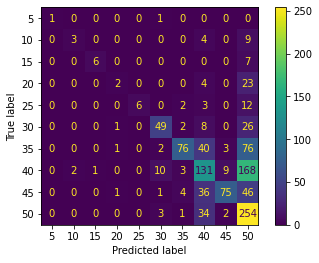

In [75]:
from sklearn.svm import SVC

clf = SVC(random_state=0, class_weight = 'balanced')
clf.fit(xTrainScaled, yTrain)

yPredTrain = clf.predict(xTrainScaled)
yPredTest = clf.predict(xTestScaled)

plot_confusion_matrix(clf, xTestScaled, yTest)

print(f"Accuracy Train Score: {accuracy_score(yTrain, yPredTrain)}")
print(f"Accuracy Test Score: {accuracy_score(yTest, yPredTest)}")
print('-----')
print(f"F1-Train Score: {f1_score(yTrain, yPredTrain)}")
print(f"F1-Test Score: {f1_score(yTest, yPredTest)}")
print('-----')
print(f"Precision Train Score: {precision_score(yTrain, yPredTrain)}")
print(f"Precision Test Score: {precision_score(yTest, yPredTest)}")
print('-----')
print(f"Recall Train Score: {recall_score(yTrain, yPredTrain)}")
print(f"Recall Test Score: {recall_score(yTest, yPredTest)}")

In [89]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(ratings,reader)

In [90]:
trainset, testset = train_test_split(data, test_size=0.2)

In [92]:
sim_cos = {'name':'cosine', 'user_based':False}
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [93]:
basic.sim

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.88164597, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.88164597, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [94]:
predictions = basic.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.9746
0.9745988092806438


In [95]:
sim_pearson = {'name':'pearson', 'user_based':False}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9707
0.9707120449347403


In [96]:
sim_pearson = {'name':'pearson', 'user_based':False}
knn_means = knns.KNNWithMeans(sim_options=sim_pearson)
knn_means.fit(trainset)
predictions = knn_means.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9080
0.9079565438763787


In [97]:
sim_pearson = {'name':'pearson', 'user_based':False}
knn_baseline = knns.KNNBaseline(sim_options=sim_pearson)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8813
0.8812723903865302


In [98]:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV
svd = SVD(n_factors=100, n_epochs=10, lr_all=0.005, reg_all=0.4)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.8926
0.8925995840605463


In [99]:
user_34_prediction = svd.predict('34', '25')
user_34_prediction

user_34_prediction[3]

3.498183914315466